# Importing Libraries

In [139]:
#Data Preprocessing
import numpy as np 
import pandas as pd 

import time
import pandas as pd
import numpy as np
import nltk
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [140]:
data_frame = pd.read_csv('weatherprediction.csv') 

In [141]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [142]:
data_frame.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [143]:
data_frame.isnull().sum() #checking for null values in the dataset

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [144]:
# Since date is of data type object, we will convert into datetime data type using pandas library
data_frame['date'] = pd.to_datetime(data_frame['date'])
data_frame

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [145]:
# Creating three separate columns for year, month and day
data_frame['year'] = data_frame['date'].dt.year #Generate Year Column
data_frame['month'] = data_frame['date'].dt.month #Generate Month Column
data_frame['day'] = data_frame['date'].dt.day

data_frame.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5


In [146]:
# Label encoding of 'weather' attribute for further computations
from sklearn.preprocessing import LabelEncoder

data_frame['label_weather'] = LabelEncoder().fit_transform(data_frame['weather'])
data_frame.head(10)

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,label_weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1,1,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1,2,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1,3,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1,4,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1,5,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2012,1,6,2
6,2012-01-07,0.0,7.2,2.8,2.3,rain,2012,1,7,2
7,2012-01-08,0.0,10.0,2.8,2.0,sun,2012,1,8,4
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2012,1,9,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2012,1,10,2


In [147]:
data_frame['date'] = pd.to_numeric(pd.to_datetime(data_frame['date']))
data_frame

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,label_weather
0,1325376000000000000,0.0,12.8,5.0,4.7,drizzle,2012,1,1,0
1,1325462400000000000,10.9,10.6,2.8,4.5,rain,2012,1,2,2
2,1325548800000000000,0.8,11.7,7.2,2.3,rain,2012,1,3,2
3,1325635200000000000,20.3,12.2,5.6,4.7,rain,2012,1,4,2
4,1325721600000000000,1.3,8.9,2.8,6.1,rain,2012,1,5,2
...,...,...,...,...,...,...,...,...,...,...
1456,1451174400000000000,8.6,4.4,1.7,2.9,rain,2015,12,27,2
1457,1451260800000000000,1.5,5.0,1.7,1.3,rain,2015,12,28,2
1458,1451347200000000000,0.0,7.2,0.6,2.6,fog,2015,12,29,1
1459,1451433600000000000,0.0,5.6,-1.0,3.4,sun,2015,12,30,4


In [148]:
# Store the weather_label values in y and everything other than label_weather in x

x = data_frame.drop(['label_weather'], axis = 1)
x = data_frame.drop(['weather'], axis = 1)
y = data_frame['label_weather']

In [149]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 9)
(293, 9)
(1168,)
(293,)


In [150]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [151]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


LogisticRegression(random_state=0)

In [152]:
y_predlr = classifier.predict(x_test)

In [153]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.90      0.95        29
           2       0.99      1.00      1.00       123
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00       125

    accuracy                           0.99       293
   macro avg       0.97      0.98      0.97       293
weighted avg       0.99      0.99      0.99       293



In [158]:
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_predlr), 2)))
print('Precision Score : ' + str(round(precision_score(y_test, y_predlr, average='macro'), 2)))
print('Recall Score : ' + str(round(recall_score(y_test, y_predlr, average='macro'), 2)))
print('F1 Score : ' + str(round(f1_score(y_test, y_predlr, average='macro'), 2)))



Accuracy Score : 0.99
Precision Score : 0.97
Recall Score : 0.98
F1 Score : 0.97


[[ 10   0   0   0   0]
 [  2  26   1   0   0]
 [  0   0 123   0   0]
 [  0   0   0   6   0]
 [  0   0   0   0 125]]


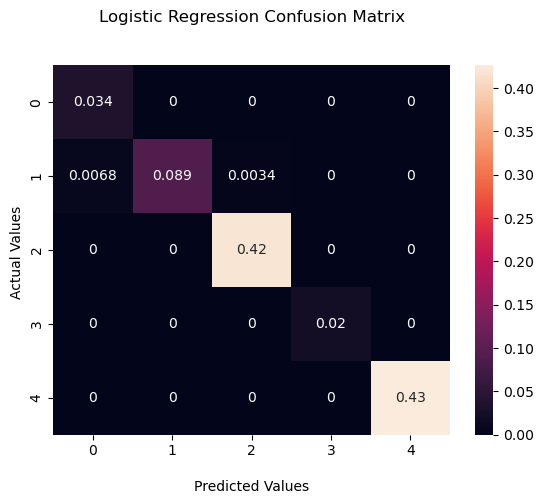

In [159]:
cf_matrix_lr = confusion_matrix(y_test, y_predlr)
print(cf_matrix_lr)

ax = sns.heatmap(cf_matrix_lr/np.sum(cf_matrix_lr), annot=True)

ax.set_title('Logistic Regression Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2','3','4'])
ax.yaxis.set_ticklabels(['0','1', '2','3','4'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [160]:
#split dataset in features and target variable
feature_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
X = data_frame[feature_cols] # Features
y = data_frame.weather # Target variable
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [161]:
# Random forests are a popular supervised machine learning algorithm. 

# Random forests are for supervised machine learning, where there is a labeled target variable.
# Random forests can be used for solving regression (numeric target variable) and classification (categorical target variable) problems.
# Random forests are an ensemble method, meaning they combine predictions from other models.
# Each of the smaller models in the random forest ensemble is a decision tree.
# Create random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predrf)
print("Accuracy:", accuracy)


Accuracy: 0.8496583143507973


In [162]:
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_predrf), 2)))
print('Precision Score : ' + str(round(precision_score(y_test, y_predrf, average='macro'), 2)))
print('Recall Score : ' + str(round(recall_score(y_test, y_predrf, average='macro'), 2)))
print('F1 Score : ' + str(round(f1_score(y_test, y_predrf, average='macro'), 2)))


Accuracy Score : 0.85
Precision Score : 0.68
Recall Score : 0.48
F1 Score : 0.51


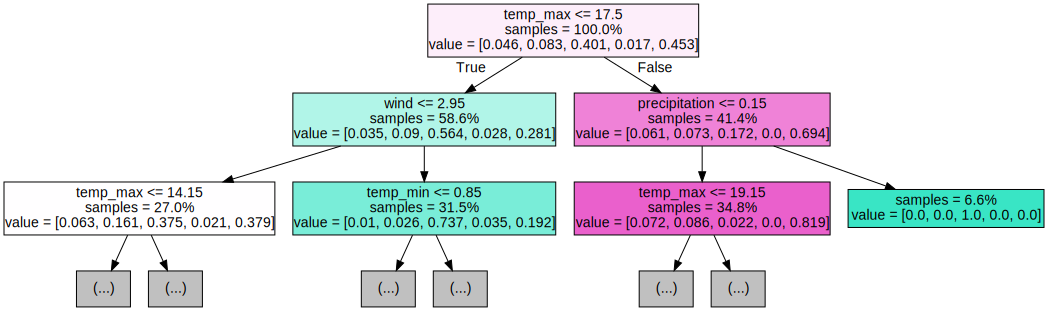

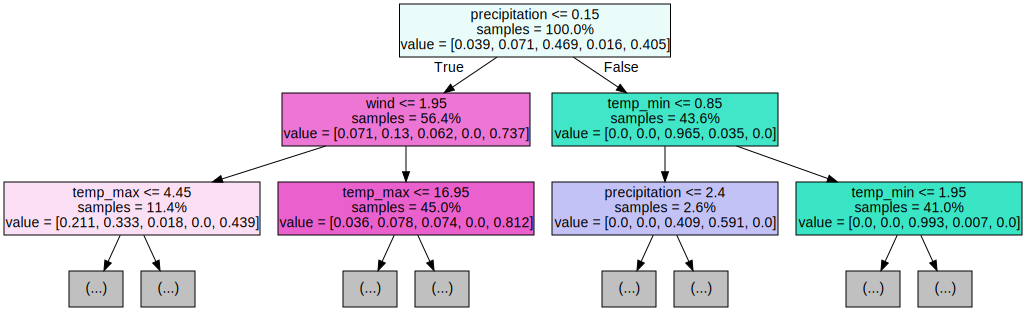

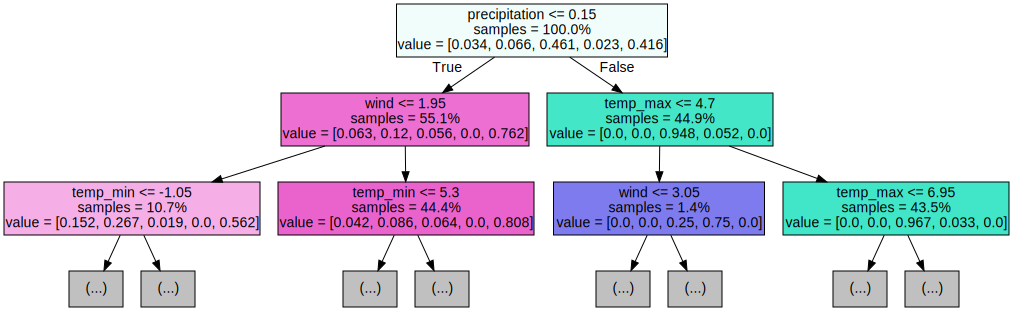

In [163]:
# Visualizing the Results
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [164]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe476277b80>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe4761ef220>})

In [165]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'n_estimators': 115}


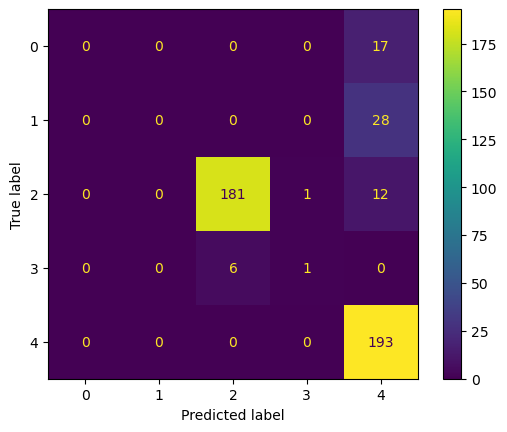

In [166]:
# Generate predictions with the best model
y_predrf = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_predrf)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

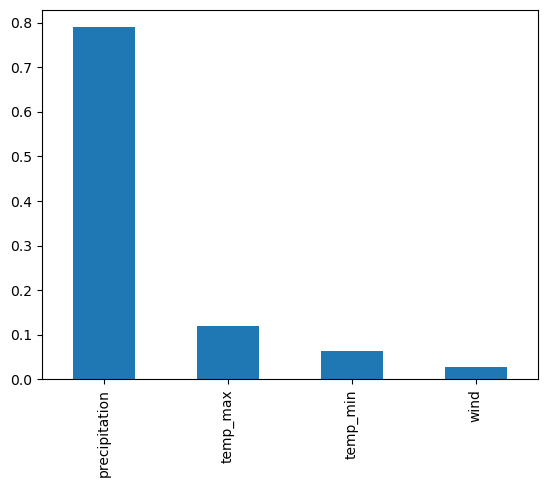

In [167]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

In [168]:
# This tells us that the precipitayion, at the time of the call, 
# was the biggest predictor in weather prediction

In [169]:
accuracy = accuracy_score(y_test, y_predrf)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_predrf))

Accuracy: 0.8542141230068337
              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        17
         fog       0.00      0.00      0.00        28
        rain       0.97      0.93      0.95       194
        snow       0.50      0.14      0.22         7
         sun       0.77      1.00      0.87       193

    accuracy                           0.85       439
   macro avg       0.45      0.42      0.41       439
weighted avg       0.78      0.85      0.81       439



/Users/aidenliang/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aidenliang/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aidenliang/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_predrf), 2)))
print('Precision Score : ' + str(round(precision_score(y_test, y_predrf, average='macro'), 2)))
print('Recall Score : ' + str(round(recall_score(y_test, y_predrf, average='macro'), 2)))
print('F1 Score : ' + str(round(f1_score(y_test, y_predrf, average='macro'), 2)))


Accuracy Score : 0.85
Precision Score : 0.45
Recall Score : 0.42
F1 Score : 0.41


/Users/aidenliang/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [171]:
# Random Forest model has accuracy: 0.860.

In [172]:
# The kNN algorithm can be considered a voting system, 
# where the majority class label determines the class label of a new data point among its nearest ‘k’ 
#(where k is an integer) neighbors in the feature space.

In [173]:
# create knn model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fitting and Evaluating the Model
# For this, we’ll use a fixed value of 3 for k, but we’ll need to optimize this later on. 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [174]:
y_predknn = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_predknn)
print("Accuracy:", accuracy)

Accuracy: 0.6947608200455581


In [175]:
print('Accuracy Score : ' + str(round(accuracy_score(y_test, y_predknn), 2)))
print('Precision Score : ' + str(round(precision_score(y_test, y_predknn, average='macro'), 2)))
print('Recall Score : ' + str(round(recall_score(y_test, y_predknn, average='macro'), 2)))
print('F1 Score : ' + str(round(f1_score(y_test, y_predknn, average='macro'), 2)))

Accuracy Score : 0.69
Precision Score : 0.58
Recall Score : 0.42
F1 Score : 0.44


In [176]:
# Using Cross Validation to Get the Best Value of k
# we select a range of values for k and create an empty list to store our results. 
# We use cross-validation to find the accuracy scores, 
# which means we don’t need to create a training and test split, 
# but we do need to scale our data. We then loop over the values and add the scores to our list.
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

In [177]:
# We can now train our model using the best k value using the code below.
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)

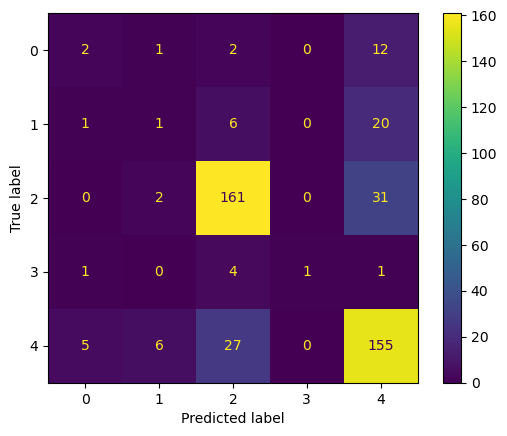

In [179]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_predknn)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [180]:
y_predknn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_predknn)


print("Accuracy:", accuracy)

Accuracy: 0.7289293849658315


In [181]:
# Thus, KNN model has accuracy 0.744.

In [183]:
# create decision tree model
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [184]:
# Model Accuracy before opmization
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7562642369020501


Accuracy: 0.8428246013667426


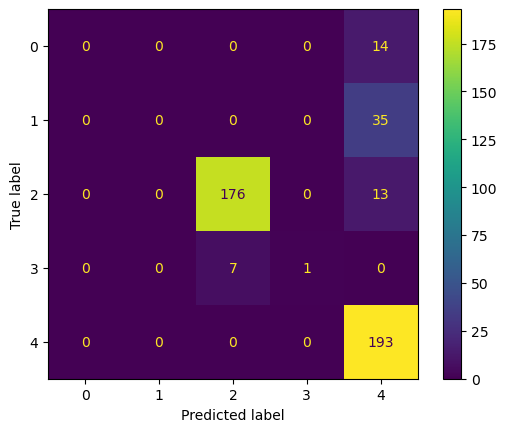

In [185]:
# In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. 
# Maximum depth of the tree can be used as a control variable for pre-pruning. 
# In the model, we plot a decision tree on the same data with max_depth=3. 
# We also use attribute selection measure entropy.

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_preddt = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_preddt))
# Create the confusion matrix
cm = confusion_matrix(y_test, y_preddt)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [45]:
# Therefore, Decision tree model has accuracy 0.843 .

In [122]:
# LASSO and Ridge regression
wp = pd.read_csv("weatherprediction.csv")

# convert catergory variable to number
wp['weather'].replace(['drizzle', 'rain', 'sun','snow','fog'],
                        [0, 1,2,3,4], inplace=True)

print(wp)
y = wp.weather # Target variable

features = wp.columns[1:5]
print(features)
X = wp[features].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) # 70% training and 30% test
print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7        0
1     2012-01-02           10.9      10.6       2.8   4.5        1
2     2012-01-03            0.8      11.7       7.2   2.3        1
3     2012-01-04           20.3      12.2       5.6   4.7        1
4     2012-01-05            1.3       8.9       2.8   6.1        1
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9        1
1457  2015-12-28            1.5       5.0       1.7   1.3        1
1458  2015-12-29            0.0       7.2       0.6   2.6        4
1459  2015-12-30            0.0       5.6      -1.0   3.4        2
1460  2015-12-31            0.0       5.6      -2.1   3.5        2

[1461 rows x 6 columns]
Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')
The dimension of X_train is (1022, 4)
The dimension of X_test is (439, 4)


In [123]:
#Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso

lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
prediction = lr.predict(X_test)
#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.13733858707625857
The test score for lr model is 0.13242588550716383


In [124]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.13703769040890146
The test score for ridge model is 0.13352886490611127


In [125]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.001195612357521858


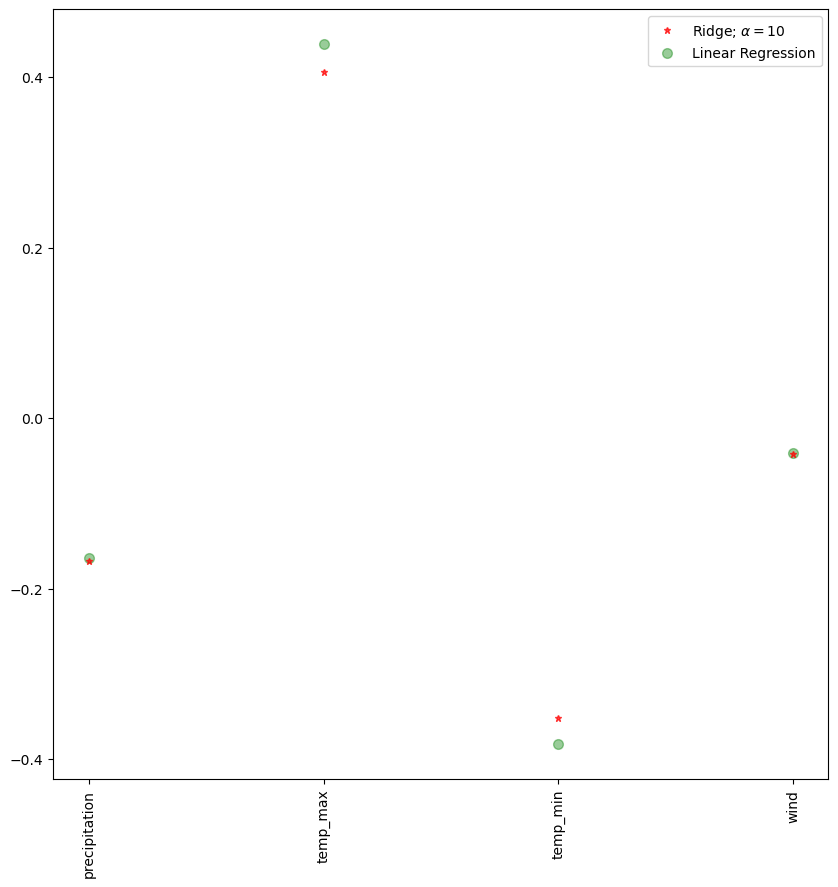

In [126]:
# Using an alpha value of 10, the evaluation of the model, the train, 
# and test data indicate better performance on the ridge model than on the linear regression model.

# We can also plot the coefficients for both the linear and ridge models.
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Index(['precipitation', 'temp_max', 'temp_min', 'wind'], dtype='object')


<Axes: >

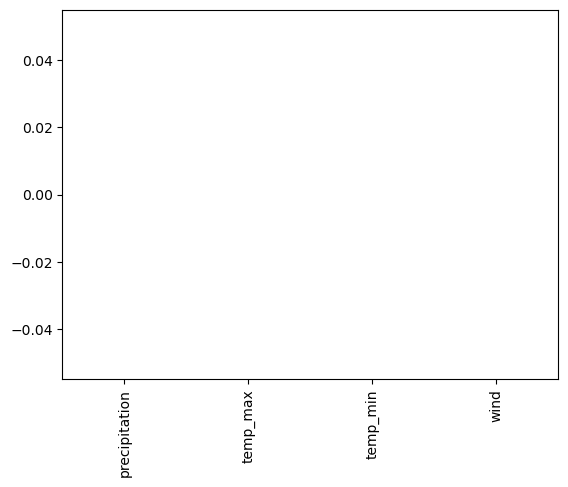

In [121]:
# We can visualize the coefficients too.
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")


In [127]:
# Earlier on, we established that the lasso model can inert to zero due to the diamond shape of the constraint region.
# In this case, using an alpha value of 10 over penalizes the model and shrinks all the values to zero. 
# We can see this effectively by visualizing the coefficients of the model as shown in the figure above.



In [128]:
# Selecting Optimal Alpha Values Using Cross-Validation in Sklearn
# Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.13731703064715872
0.13275024428770554


In [129]:
# Therefore, LASSO regression and Ridge regression is not a good model for weather prediction 
# since it has very low score.

In [130]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [131]:
data_frame_final = data_frame.drop(['weather'],axis=1).set_index('date')
data_frame_final

,precipitation,temp_max,temp_min,wind,year,month,day,label_weather
date,,,,,,,,
1325376000000000000,0.0,12.8,5.0,4.7,2012,1,1,0
1325462400000000000,10.9,10.6,2.8,4.5,2012,1,2,2
1325548800000000000,0.8,11.7,7.2,2.3,2012,1,3,2
1325635200000000000,20.3,12.2,5.6,4.7,2012,1,4,2
1325721600000000000,1.3,8.9,2.8,6.1,2012,1,5,2
...,...,...,...,...,...,...,...,...
1451174400000000000,8.6,4.4,1.7,2.9,2015,12,27,2
1451260800000000000,1.5,5.0,1.7,1.3,2015,12,28,2
1451347200000000000,0.0,7.2,0.6,2.6,2015,12,29,1


In [132]:
# Label encoding of 'weather' attribute for further computations
from sklearn.preprocessing import LabelEncoder
def date_time(data_frame) :
    
    data_frame['date'] = pd.to_datetime(data_frame['date'])
    data_frame['year'] = data_frame['date'].dt.year #Generate Year Column
    data_frame['month'] = data_frame['date'].dt.month #Generate Month Column
    data_frame['day'] = data_frame['date'].dt.day
    
    return data_frame

data_frame_final = date_time(data_frame)
data_frame_final

data_frame['label_weather'] = LabelEncoder().fit_transform(data_frame['weather'])
data_frame.head(10)

data_frame_final = data_frame_final.drop(['weather'],axis=1).set_index('date')
data_frame_final

,precipitation,temp_max,temp_min,wind,year,month,day,label_weather
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,2012,1,1,0
2012-01-02,10.9,10.6,2.8,4.5,2012,1,2,1
2012-01-03,0.8,11.7,7.2,2.3,2012,1,3,1
2012-01-04,20.3,12.2,5.6,4.7,2012,1,4,1
2012-01-05,1.3,8.9,2.8,6.1,2012,1,5,1
...,...,...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,2015,12,27,1
2015-12-28,1.5,5.0,1.7,1.3,2015,12,28,1
2015-12-29,0.0,7.2,0.6,2.6,2015,12,29,4


In [186]:
# Store the weather_label values in y and everything other than label_weather in x
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

x = data_frame_final.drop(['label_weather'], axis = 1)
y = data_frame_final['label_weather']


over_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}
under_strategy = {0 : 1000, 1 : 1000, 2 : 1000, 3 : 1000, 4 : 2000}

over_sample = SMOTE(sampling_strategy = over_strategy)
under_sample = RandomUnderSampler(sampling_strategy = under_strategy)
x_final,y = over_sample.fit_resample(x,y)
x_final,y = under_sample.fit_resample(x_final, y)

/Users/aidenliang/anaconda3/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 0 will be larger than the number of samples in the majority class (class #1 -> 641)
  warnings.warn(
/Users/aidenliang/anaconda3/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 641)
  warnings.warn(
/Users/aidenliang/anaconda3/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 2 will be larger than the number of samples in the majority class (class #1 -> 641)
  warnings.warn(
/Users/aidenliang/anaconda3/lib/python3.10/site-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (1000) in class 3 will be larger than the number of sampl

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_final, y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4800, 7)
(1200, 7)
(4800,)
(1200,)


In [188]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
np.random.seed(10)
model.fit(x_train,y_train)

pred_all = model.predict(x_final)
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

print(f'Accuracy Score on All Data : {round(accuracy_score(y, pred_all),2)*100}')
print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')

Accuracy Score on All Data : 76.0
Accuracy Score on Train Data : 76.0
Accuracy Score on Test Data : 77.0


In [189]:
print(classification_report(y,pred_all))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.97      0.87      0.92      1000
           2       0.47      0.36      0.40      1000
           3       0.93      0.97      0.95      1000
           4       0.74      0.80      0.77      2000

    accuracy                           0.76      6000
   macro avg       0.76      0.75      0.75      6000
weighted avg       0.75      0.76      0.75      6000



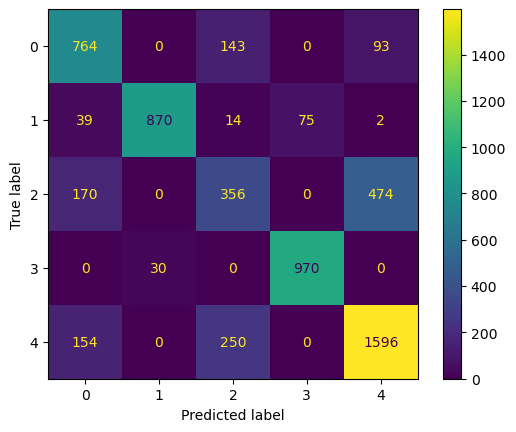

In [193]:
# Create the confusion matrix
cm = confusion_matrix(y, pred_all)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [194]:
# RNN model
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

2023-05-05 22:29:20.392632: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [195]:
dataset = pd.read_csv(
    "weatherprediction.csv", index_col="date", parse_dates=["date"]
)
print(dataset.head())

            precipitation  temp_max  temp_min  wind  weather
date                                                        
2012-01-01            0.0      12.8       5.0   4.7  drizzle
2012-01-02           10.9      10.6       2.8   4.5     rain
2012-01-03            0.8      11.7       7.2   2.3     rain
2012-01-04           20.3      12.2       5.6   4.7     rain
2012-01-05            1.3       8.9       2.8   6.1     rain


In [196]:
# The .describe() function helps us analyze the data in depth.
print(dataset.describe())

       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


In [197]:
# By using .isna().sum() we can determine the missing values in the dataset. 
# It seems that the dataset has no missing values.
dataset.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

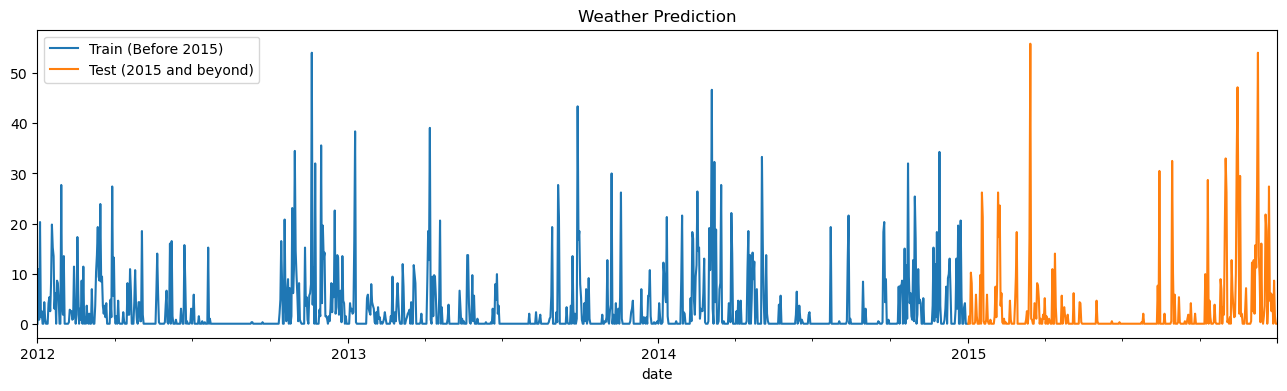

In [198]:
# Let’s focus on the precipitation column as we are going to use it to train the model.
# Preciputation makes more sense for most classification models we tested.
# The train_test_plot function takes three arguments: dataset, tstart, and tend and plots a simple line graph. 
# The tstart and tend are time limits in years. We can change these arguments to analyze specific periods. 
# The line plot is divided into two parts: train and test. 
# This will allow us to decide the distribution of the test dataset.
tstart = 2012
tend = 2014

# Our test dataset consists of one year, 2015, and the rest of the dataset is used for training.

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "precipitation"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "precipitation"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Weather Prediction")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [199]:
# Data Preprocessing
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "precipitation"].values
    test = dataset.loc[f"{tend+1}":, "precipitation"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

In [200]:
# We will use the MinMaxScaler function to standardize our training set, 
# which will help us avoid the outliers or anomalies. 
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [201]:
# In this project, we are using 60 n_steps.
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [202]:
# Reshaping X_train for model
# We are working with univariate series, so the number of features is one, 
# and we need to reshape the X_train to fit on the LSTM model. 
# The X_train has [samples, timesteps], and we will reshape it to [samples, timesteps, features].
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [203]:
# LSTM Model
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse",metrics=['accuracy'])

model_lstm.summary()

2023-05-05 22:31:03.484169: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 125)               63500     
                                                                 
 dense (Dense)               (None, 1)                 126       
                                                                 
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [204]:
# The model will train on 50 epochs with 32 batch sizes. 
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
33/33 [==============================] - 6s 56ms/step - loss: 0.0133 - accuracy: 0.5772
Epoch 2/50
33/33 [==============================] - 2s 72ms/step - loss: 0.0128 - accuracy: 0.5772
Epoch 3/50
33/33 [==============================] - 2s 55ms/step - loss: 0.0126 - accuracy: 0.5772
Epoch 4/50
33/33 [==============================] - 2s 70ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 5/50
33/33 [==============================] - 2s 67ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 6/50
33/33 [==============================] - 2s 62ms/step - loss: 0.0124 - accuracy: 0.5772
Epoch 7/50
33/33 [==============================] - 2s 70ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 8/50
33/33 [==============================] - 3s 79ms/step - loss: 0.0124 - accuracy: 0.5772
Epoch 9/50
33/33 [==============================] - 2s 49ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 10/50
33/33 [==============================] - 2s 50ms/step - loss: 0.0124 - accuracy: 0.5772
Epoch 11/

In [205]:
model_lstm.save('weatherprediction.h5')

# Results
# We are going to repeat preprocessing and normalize the test set. 
# First of all we will transform then split the dataset into samples, reshape it, predict, 
# and inverse transform the predictions into standard form.
dataset_total = dataset.loc[:,"precipitation"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_weather = model_lstm.predict(X_test)
#inverse transform the values
predicted_weather = sc.inverse_transform(predicted_weather)

12/12 [==============================] - 1s 23ms/step


In [206]:
# The plot_predictions function will plot a real versus predicted line chart. 
# This will help us visualize the difference between actual and predicted values.

def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("Weather Prediction")
    plt.xlabel("Time")
    plt.ylabel("Weather")
    plt.legend()
    plt.show()

# The return_rmse function takes in test and predicted arguments 
# and prints out the root mean square error (rmse) metric.

def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

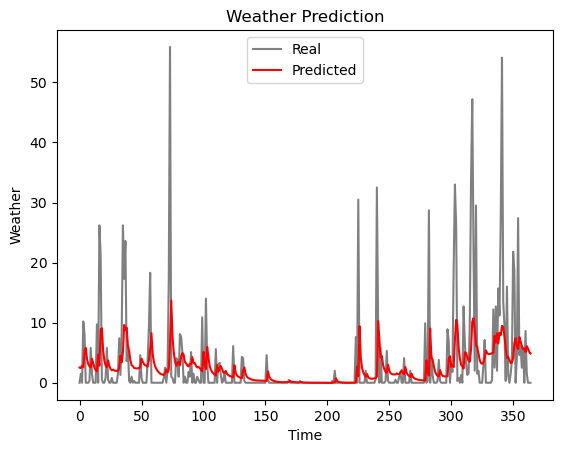

In [207]:
# According to the line plot below, the single-layered LSTM model has performed well.
plot_predictions(test_set,predicted_weather)

In [208]:
return_rmse(test_set,predicted_weather)

The root mean squared error is 6.98.


In [209]:
# converting categorical variables in y_train to numerical variables

print('Shape of Label tensor: ', y_test.shape)

Shape of Label tensor:  (365, 1)


In [210]:
# model evaluation
from keras.models import load_model

model = load_model('weatherprediction.h5')
scores = model.evaluate(X_test, y_test)
print(scores)
LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

12/12 [==============================] - 1s 25ms/step - loss: 0.0166 - accuracy: 0.6055
[0.016631754115223885, 0.6054794788360596]
Test accuracy:  60.54794788360596 %


In [211]:
# Therefore, LSTM model has accuracy 0.6054

In [212]:
# GRU Model
# We are going to keep everything the same and just replace the LSTM layer with the GRU layer to properly compare the results. 
# The model structure contains a single GRU layer with 125 units and an output layer.
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse",metrics=['accuracy'])

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 125)               48000     
                                                                 
 dense_1 (Dense)             (None, 1)                 126       
                                                                 
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [213]:
# The model has successfully trained with 50 epochs and a batch size of 32.
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
33/33 [==============================] - 6s 83ms/step - loss: 0.0132 - accuracy: 0.5772
Epoch 2/50
33/33 [==============================] - 3s 82ms/step - loss: 0.0127 - accuracy: 0.5772
Epoch 3/50
33/33 [==============================] - 2s 73ms/step - loss: 0.0126 - accuracy: 0.5772
Epoch 4/50
33/33 [==============================] - 2s 52ms/step - loss: 0.0126 - accuracy: 0.5772
Epoch 5/50
33/33 [==============================] - 2s 53ms/step - loss: 0.0126 - accuracy: 0.5772
Epoch 6/50
33/33 [==============================] - 2s 60ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 7/50
33/33 [==============================] - 2s 55ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 8/50
33/33 [==============================] - 3s 93ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 9/50
33/33 [==============================] - 4s 111ms/step - loss: 0.0126 - accuracy: 0.5772
Epoch 10/50
33/33 [==============================] - 4s 116ms/step - loss: 0.0125 - accuracy: 0.5772
Epoch 1

12/12 [==============================] - 0s 18ms/step


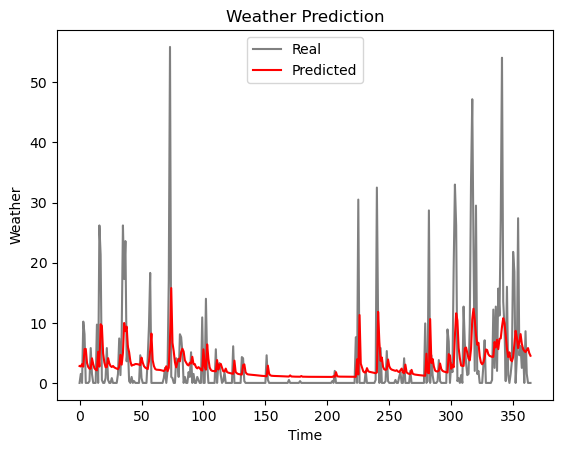

In [221]:
model_gru.save('GRU_prediction.h5')
GRU_predicted_weather = model_gru.predict(X_test)
GRU_predicted_weather = sc.inverse_transform(GRU_predicted_weather)
plot_predictions(test_set, GRU_predicted_weather)

In [222]:
return_rmse(test_set,GRU_predicted_weather)


The root mean squared error is 6.98.


In [223]:
model2 = load_model('GRU_prediction.h5')
scores2 = model2.evaluate(X_test, y_test)
print(scores2[1])
GRU_accuracy = scores2[1]*100
print('GRU Test accuracy: ', scores2[1]*100, '%')

12/12 [==============================] - 1s 19ms/step - loss: 0.0167 - accuracy: 0.6055
0.6054794788360596
GRU Test accuracy:  60.54794788360596 %


In [224]:
# In conclusion, GRU model and LSTM model are the same since it has the same mean squared error and accuracy.